# Dispersión de Rutherford

Nesta práctica trataremos de observar como se amoldan os datos experimentais da dispersión de partículas $\alpha$ ao traspasaren unha lámina de ouro e outra de aluminio á teoría de Rutherford:

$$N(\theta)=N_0c_Fd_F\frac{Z^2e^4}{(8\pi\epsilon_0E_\alpha)^2}\frac{1}{sen^4(\theta/2)}$$

Aquí, temos $N_0$ sendo o máximo de partículas dispersadas á altura á que situaremos as correspondentes láminas.
$d_F$ representando o grosor da lámina.
$c_F$ sendo a concentración de átomos no material.

`Pregunta!!!! é $N_d(\theta)$ ou $Nd\theta$?? ou son cousas diferentes? porque se non son o mesmo entón non entendo o da conversión do ángulo sólido`


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 12:35:40 2021

@author: ritav
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #para axustar a unha distribución normal
import scipy.optimize as so

## Fondo

Sen branco nin fonte; sen facer baleiro.

Temos 0 medidas no fondo recollidas ao longo de 2 minutos. Isto deberase a que a radiación $\gamma$ do ambiente é baixísima e a radiación $\alpha$ que poida haber queda absorbida polos centímetros de aire. 

No caso de facer esta medida unha vez realizado o baleiro, as contas dispáranse (experiencia realizada no laboratorio para mellor comprensión do fenómeno).

## Ángulo de non dispersión e $N_0$

Para isto usamos as medidas tomadas para o perfil do feixe (non teñen moito xeito). Deberían seguir unha distribución gaussiana como se amosa a continuación:



 m=-0.0114 ; s=0.0624


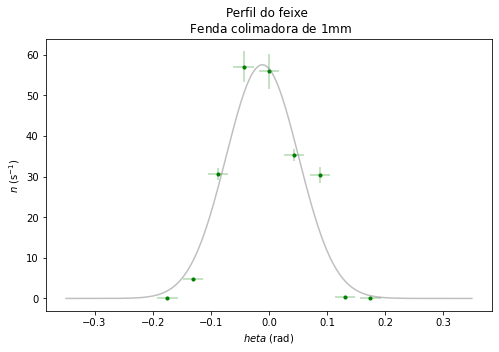

In [8]:
def G(T, m, s):
    G=9/(np.sqrt(2*np.pi)*s)*np.e**(-(T-m)**2/(2*s**2))
    return G

T=np.linspace(-(np.pi/180)*20, (np.pi/180)*20, 1000)
Gauss=G(T,0,1)


xperfil=(np.pi/180)*np.array([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
nperfil=np.array([0.027777778, 4.691666667, 30.60606061, 57.04761905, 55.94444444, 35.32142857, 30.42424242, 0.462184874, 0])
snperfil=np.array([0.012424097, 0.20368026, 1.507143109, 3.774556239, 4.266320371, 1.500016513, 1.935958136, 0.06250981, 0])

fig1=plt.subplots(1, 1, figsize=(8,5))
plt.plot(xperfil,nperfil,'g.')
coef=so.curve_fit(G, xperfil, nperfil)
yfit=G(T,coef[0][0],coef[0][1])
plt.plot(T, yfit, color= 'grey', ls='-', alpha=0.5)
plt.xlabel(u'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(u'$n$ $\mathrm{(s^{-1})}$')
plt.errorbar(xperfil, nperfil, yerr=snperfil, xerr=np.pi/90, fmt="g.", alpha=0.3)

plt.title(u'Perfil do feixe \n Fenda colimadora de $1\mathrm{mm}$')

print(' m=%.4f ; s=%.4f' % (coef[0][0],coef[0][1]))

Os datos non se axustan de todo mal ao modelo gaussiano (sobre todo cando consideramos as incertezas experimentais), polo que agora tomaremos a curva de axuste como referencia. Esta curva é simétrica respecto do seu punto máximo, que nos indicará tanto o ángulo de non dispersión como o parámetro $N_0$ que precisamos para o cálculo da dispersión de Rutherford.

In [9]:
print('N_0=',np.max(yfit))
print(u'O ángulo de non dispersión é', T[np.where(yfit==np.max(yfit))]*180/np.pi, 'graos', '=', T[np.where(yfit==np.max(yfit))], 'rad')


N_0= 57.51499488483361
O ángulo de non dispersión é [-0.66066066] graos = [-0.0115307] rad


Polo tanto, temos que substraer de todas as coordenadas angulares este parámetro $\theta_0=-0.66066066\mathrm{\degree}=-0.0115307 \mathrm{rad}$.

Ad`Podo coller o $N_0$ e multiplicalo por 5 para ter o correspondente á fenda de 5mm`

Chi cadrado
Quito puntos do centro (5, 7.5)

Recalculo o centro  das distribucións en cada fórmula e comparalo co do perfil.

Mirar o do ángulo subtendido.

Do axuste de rutherford quitar o N0 e comparalo.

## Dispersión de Rutherford

Agora graficaremos o número de contas en cada un dos casos con branco, en función do ángulo do detector respecto do branco e a fonte. Esperamos obter algo similar á dispersión de Rutherford.

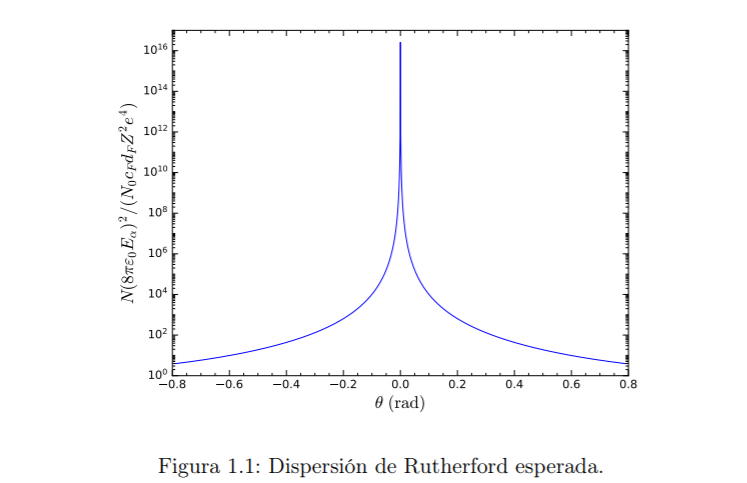
(esta gráfica é da memoria de Javi Mariño do ano pasado, igual habería que facer unha gráfica nova ou simplement poñelo en bibliografía)


Nembargantes, a fórmula de dispersión de Rutherford presentada ao principio refírese a unha distribución espacial (tridimensional), mentres que nós só estamos a recoller os datos no plano do detector. Por tanto, temos que usar a relación do ángulo sólido $d\Omega=2\pi sin(\theta)d\theta$ para extrapolar os resultados aplicables ao caso tridimensional. Entón aplicaremos aos nosos datos a seguinte conversión:

$$N(\theta)=2\pi sen(\theta)N_d(\theta)$$

Ademais, trataremos por separado os datos dos lados positivo e negativo do eixe x.

### Presentación dos datos recollidos

A continuación representamos os datos recollidos para cada un dos escenarios, e posteriormente faremos a conversión entre eles e conseguiremos os resultados experimentais buscados nesta práctica.

In [98]:
def N(t,N0, b):
    N=N0*6.022*10**23*19.3/197*2.5*(79/(8*np.pi*8.85*10**(-12)*4.5*10**6))**2*1.602**2*10**(-38)/(np.sin((t/2-b)*np.pi/180)**4)
    return N

N0neg= 3197.467243476273 Bneg= 5.297579758956614
N0pos= 4125.8769537958115 Bneg= -6.492827436330598


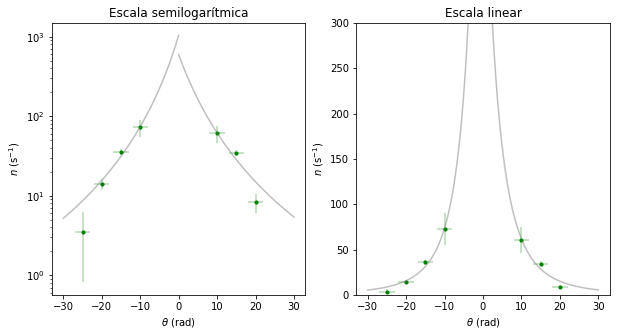

In [99]:
Tneg=np.linspace(-30, 0.0000000001, 500)
Tpos=np.linspace(0.0000000001, 30, 500)


xOURO5neg=np.array([-25, -20, -15, -10])
nOURO5neg=np.array([3.51101415, 14.03997614, 35.65461087, 72.91942252])
snOURO5neg=np.array([2.698818425, 2.220204123, 2.789700892, 17.56873476])



xOURO5pos=np.array([ 10, 15, 20])
nOURO5pos=np.array([60.59040295, 34.47561005, 8.261618611])
snOURO5pos=np.array([14.62493443, 3.318852118, 2.188021718])




fORO5, axsORO5 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOURO5neg,nOURO5neg,'g.')
coefOURO5neg=so.curve_fit(N, xOURO5neg, nOURO5neg)
yfitOURO5neg=N(Tneg,coefOURO5neg[0][0],coefOURO5neg[0][1])
plt.plot(Tneg, yfitOURO5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5neg, nOURO5neg,xerr=2, yerr=snOURO5neg, fmt="g.", alpha=0.3)


plt.plot(xOURO5pos,nOURO5pos,'g.')
coefOURO5pos=so.curve_fit(N, xOURO5pos, nOURO5pos)
yfitOURO5pos=N(Tpos,coefOURO5pos[0][0],coefOURO5pos[0][1])
plt.plot(Tpos, yfitOURO5pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5pos, nOURO5pos,xerr=2, yerr=snOURO5pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()
#plt.ylim(0.5, 10**(10))


plt.subplot(1, 2, 2)

plt.plot(xOURO5neg,nOURO5neg,'g.')
coefOURO5neg=so.curve_fit(N, xOURO5neg, nOURO5neg)
yfitOURO5neg=N(Tneg,coefOURO5neg[0][0],coefOURO5neg[0][1])
plt.plot(Tneg, yfitOURO5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO5neg, nOURO5neg,xerr=2, yerr=snOURO5neg, fmt="g.", alpha=0.3)

plt.plot(xOURO5pos,nOURO5pos,'g.')
coefOURO5pos=so.curve_fit(N, xOURO5pos, nOURO5pos)
yfitOURO5pos=N(Tpos,coefOURO5pos[0][0],coefOURO5pos[0][1])
plt.errorbar(xOURO5pos, nOURO5pos, xerr=2,yerr=snOURO5pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOURO5pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,300)
plt.title(u'Escala linear')

print( 'N0neg=',coefOURO5neg[0][0], 'Bneg=', coefOURO5neg[0][1])
print( 'N0pos=',coefOURO5pos[0][0], 'Bneg=', coefOURO5pos[0][1])


N0neg= 503.647164713081 Bneg= -178.02567900029595
N0pos= 316.3364491233047 Bneg= -0.9193037799069723


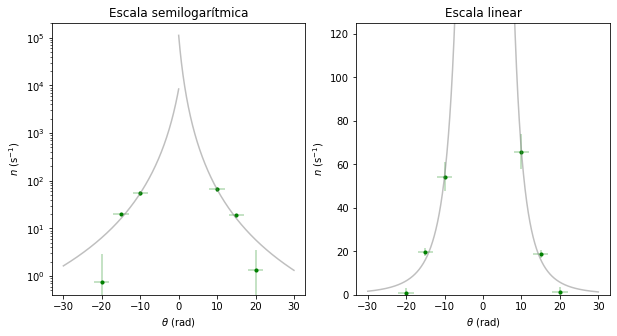

In [100]:
xAL5neg=np.array([-20, -15, -10])
nAL5neg=np.array([0.734233446, 19.74216538, 54.24404922])
snAL5neg=np.array([2.189368646, 1.822912987, 6.649268603])

xAL5pos=np.array([ 10, 15, 20])
nAL5pos=np.array([ 65.73658663, 18.67970947, 1.352064028])
snAL5pos=np.array([ 8.003761434, 1.811268297, 2.189436909])



fAL5, axsAL5 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xAL5neg,nAL5neg,'g.')
coefAL5neg=so.curve_fit(N, xAL5neg, nAL5neg)
yfitAL5neg=N(Tneg,coefAL5neg[0][0],coefAL5neg[0][1])
plt.plot(Tneg, yfitAL5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5neg, nAL5neg,xerr=2, yerr=snAL5neg, fmt="g.", alpha=0.3)

plt.plot(xAL5pos,nAL5pos,'g.')
coefAL5pos=so.curve_fit(N, xAL5pos, nAL5pos)
yfitAL5pos=N(Tpos,coefAL5pos[0][0],coefAL5pos[0][1])
plt.plot(Tpos, yfitAL5pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5pos, nAL5pos,xerr=2, yerr=snAL5pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()
#plt.ylim(0.25, 10**(10))


plt.subplot(1, 2, 2)

plt.plot(xAL5neg,nAL5neg,'g.')
coefAL5neg=so.curve_fit(N, xAL5neg, nAL5neg)
yfitAL5neg=N(Tneg,coefAL5neg[0][0],coefAL5neg[0][1])
plt.plot(Tneg, yfitAL5neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL5neg, nAL5neg, xerr=2, yerr=snAL5neg, fmt="g.", alpha=0.3)

plt.plot(xAL5pos,nAL5pos,'g.')
coefAL5pos=so.curve_fit(N, xAL5pos, nAL5pos)
yfitAL5pos=N(Tpos,coefAL5pos[0][0],coefAL5pos[0][1])
plt.errorbar(xAL5pos, nAL5pos, xerr=2,yerr=snAL5pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitAL5pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0,125)
plt.title(u'Escala linear')

print( 'N0neg=',coefAL5neg[0][0], 'Bneg=', coefAL5neg[0][1])
print( 'N0pos=',coefAL5pos[0][0], 'Bneg=', coefAL5pos[0][1])


N0neg= 448.65689418280596 Bneg= 7.572362128119278
N0pos= 1189.4910280598274 Bneg= -9.668328872371463


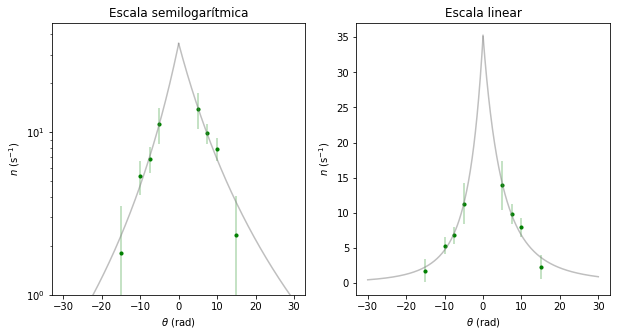

In [101]:
xOURO1neg=np.array([-15, -10, -7.5, -5])
nOURO1neg=np.array([1.806897802, 5.364396419, 6.839802911, 11.31739077])
snOURO1neg=np.array([1.696304145, 1.278523378, 1.228110844, 2.878927671])


xOURO1pos=np.array([5, 7.5, 10, 15])
nOURO1pos=np.array([13.90943833, 9.833241835, 7.946580459, 2.348967142])
snOURO1pos=np.array([3.467626471, 1.402136551, 1.326011395, 1.696782118])


fOURO1, axsOURO1 = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOURO1neg,nOURO1neg,'g.')
coefOURO1neg=so.curve_fit(N, xOURO1neg, nOURO1neg)
yfitOURO1neg=N(Tneg,coefOURO1neg[0][0],coefOURO1neg[0][1])
plt.plot(Tneg, yfitOURO1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1neg, nOURO1neg,xerr=1.5*np.pi/90, yerr=snOURO1neg, fmt="g.", alpha=0.3)


plt.plot(xOURO1pos,nOURO1pos,'g.')
coefOURO1pos=so.curve_fit(N, xOURO1pos, nOURO1pos)
yfitOURO1pos=N(Tpos,coefOURO1pos[0][0],coefOURO1pos[0][1])
plt.plot(Tpos, yfitOURO1pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1pos, nOURO1pos, xerr=1.5*np.pi/90, yerr=snOURO1pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.semilogy()
plt.ylim(1)


plt.subplot(1, 2, 2)

plt.plot(xOURO1neg,nOURO1neg,'g.')
coefOURO1neg=so.curve_fit(N, xOURO1neg, nOURO1neg)
yfitOURO1neg=N(Tneg,coefOURO1neg[0][0],coefOURO1neg[0][1])
plt.plot(Tneg, yfitOURO1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOURO1neg, nOURO1neg,xerr=1.5*np.pi/90, yerr=snOURO1neg, fmt="g.", alpha=0.3)

plt.plot(xOURO1pos,nOURO1pos,'g.')
coefOURO1pos=so.curve_fit(N, xOURO1pos, nOURO1pos)
yfitOURO1pos=N(Tpos,coefOURO1pos[0][0],coefOURO1pos[0][1])
plt.errorbar(xOURO1pos, nOURO1pos, xerr=1.5*np.pi/90,yerr=snOURO1pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOURO1pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.ylim(0,30)
plt.title(u'Escala linear')

print( 'N0neg=',coefOURO1neg[0][0], 'Bneg=', coefOURO1neg[0][1])
print( 'N0pos=',coefOURO1pos[0][0], 'Bneg=', coefOURO1pos[0][1])


N0neg= 10.763298660075845 Bneg= 2.0922017853698245
N0pos= 1.2059923724375339 Bneg= 0.8662390648516435


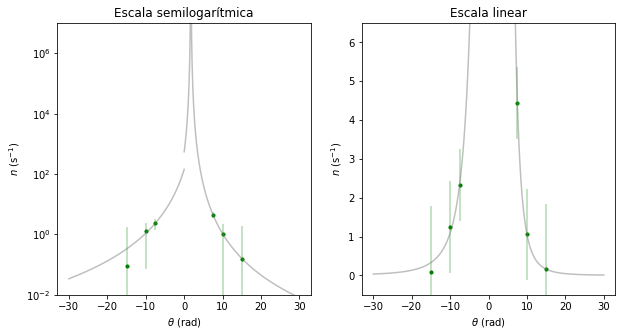

In [102]:
xAL1neg=np.array([-15, -10, -7.5])
nAL1neg=np.array([0.09034489, 1.25212546, 2.323674051])
snAL1neg=np.array([1.695612923, 1.179795663, 0.926017645])

xAL1pos=np.array([  7.5, 10, 15])
nAL1pos=np.array([ 4.43890087, 1.054694889, 0.154489762])
snAL1pos=np.array([ 0.9382347, 1.179568847, 1.68913551])




fAL1, axsAL1 = plt.subplots(2,2,figsize=(10,5))


plt.subplot(1, 2, 1)

plt.plot(xAL1neg,nAL1neg,'g.')
coefAL1neg=so.curve_fit(N, xAL1neg, nAL1neg)
yfitAL1neg=N(Tneg,coefAL1neg[0][0],coefAL1neg[0][1])
plt.plot(Tneg, yfitAL1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1neg, nAL1neg, yerr=snAL1neg, fmt="g.", alpha=0.3)

plt.plot(xAL1pos,nAL1pos,'g.')
coefAL1pos=so.curve_fit(N, xAL1pos, nAL1pos)
yfitAL1pos=N(Tpos,coefAL1pos[0][0],coefAL1pos[0][1])
plt.plot(Tpos, yfitAL1pos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1pos, nAL1pos, yerr=snAL1pos, fmt="g.", alpha=0.3)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')
plt.ylim(0.01,10**7)
plt.semilogy()


plt.subplot(1, 2, 2)

plt.plot(xAL1neg,nAL1neg,'g.')
coefAL1neg=so.curve_fit(N, xAL1neg, nAL1neg)
yfitAL1neg=N(Tneg,coefAL1neg[0][0],coefAL1neg[0][1])
plt.plot(Tneg, yfitAL1neg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xAL1neg, nAL1neg, yerr=snAL1neg, fmt="g.", alpha=0.3)

plt.plot(xAL1pos,nAL1pos,'g.')
coefAL1pos=so.curve_fit(N, xAL1pos, nAL1pos)
yfitAL1pos=N(Tpos,coefAL1pos[0][0],coefAL1pos[0][1])
plt.errorbar(xAL1pos, nAL1pos, yerr=snAL1pos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitAL1pos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(-0.5,6.5)
plt.title(u'Escala linear')

print( 'N0neg=',coefAL1neg[0][0], 'Bneg=', coefAL1neg[0][1])
print( 'N0pos=',coefAL1pos[0][0], 'Bneg=', coefAL1pos[0][1])


### Conversión entre fendas

Comprobamos que os datos non seguen un comportamento perfectamente análogo ao esperado, pero (sobre todo no caso da fenda de $1\mathrm{mm}$, que ten mair precisión angular) non quedan tan distantes tampouco. Agora o que faremos con estes datos recollidos será buscar un factor de conversión entre ambas fendas, para poder aproveitar a precisión angular da fenda máis fina pero sen perder a incerteza máis reducida da fenda grande (polo maior número de contas; idealmente poderiamos realizar todo o experimento coa fenda fina dándolle tempo abondo para chegar a un número de contas que nos proporcionase unha incerteza máis aceptable, pero isto resulta imposible dadas as nosas limitacións de equipo e tempo). 

Daquela, buscamos un factor de conversión entre as contas da forma $\displaystyle k=\frac{n_{5mm}}{n_{1mm}}$ de xeito que teremos as contas renormalizadas: $\displaystyle n_{1mm}=\frac{n_{5mm}}{k}$. Isto aplicámolo ángulo a ángulo para aqueles $\theta>5\degree$ (xa que para ángulos pequenos temos unha diverxencia na dispersión de Rutherford e os datos non son os máis fiables). Obviamente, buscaremos un factor de proporcionalidade para cada material e tamén para os ángulos positivos e negativos separadamente. Obtemos:

$$k_{Au -}=12.221119\pm3.574740777 \hspace{5mm}k_{Au +}=8.077648601\pm	2.912378714$$
$$k_{Al -}=162\pm58 \hspace{5mm}k_{Al +}=98\pm26$$

### Comprobación da dispersión de Rutherford para os novos datos

N0neg= 191.89190694879534 Bneg= 5.297580416152921
N0pos= 370.00873080334964 Bneg= -6.49284463735069


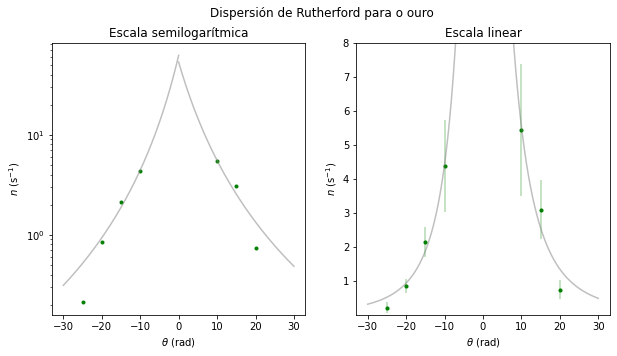

In [103]:
xOUROneg=np.array([-25, -20, -15, -10])
nOUROneg=np.array([0.210708973, 0.842591007, 2.139765353, 4.376164822])
snOUROneg=np.array([0.167176551, 0.212549742, 0.452645645, 1.360672123])


xOUROpos=np.array([10, 15, 20])
nOUROpos=np.array([ 5.433717969, 3.091756, 0.740897953])
snOUROpos=np.array([ 1.941440105, 0.867157187, 0.276762389])




fOURO, axsOURO = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xOUROneg,nOUROneg,'g.')
coefOUROneg=so.curve_fit(N, xOUROneg, nOUROneg)
yfitOUROneg=N(Tneg,coefOUROneg[0][0],coefOUROneg[0][1])
plt.plot(Tneg, yfitOUROneg, color='grey', ls='-', alpha=0.5)
#plt.errorbar(xOUROneg, nOUROneg, xerr=np.pi/180, yerr=snOUROneg, fmt="g.", alpha=0.3)

plt.plot(xOUROpos,nOUROpos,'g.')
coefOUROpos=so.curve_fit(N, xOUROpos, nOUROpos)
yfitOUROpos=N(Tpos,coefOUROpos[0][0],coefOUROpos[0][1])
plt.plot(Tpos, yfitOUROpos, color='grey', ls='-', alpha=0.5)
#plt.errorbar(xOUROpos, nOUROpos, xerr=np.pi/180, yerr=snOUROpos, fmt="g.", alpha=0.3)
plt.semilogy()

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')



plt.subplot(1, 2, 2)

plt.plot(xOUROneg,nOUROneg,'g.')
coefOUROneg=so.curve_fit(N, xOUROneg, nOUROneg)
yfitOUROneg=N(Tneg,coefOUROneg[0][0],coefOUROneg[0][1])
plt.plot(Tneg, yfitOUROneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xOUROneg, nOUROneg, xerr=np.pi/180, yerr=snOUROneg, fmt="g.", alpha=0.3)

plt.plot(xOUROpos,nOUROpos,'g.')
coefOUROpos=so.curve_fit(N, xOUROpos, nOUROpos)
yfitOUROpos=N(Tpos,coefOUROpos[0][0],coefOUROpos[0][1])
plt.errorbar(xOUROpos, nOUROpos, xerr=np.pi/180, yerr=snOUROpos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitOUROpos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(0.00001,8)
plt.title(u'Escala linear')

plt.suptitle(u'Dispersión de Rutherford para o ouro')


print( 'N0neg=',coefOUROneg[0][0], 'Bneg=', coefOUROneg[0][1])
print( 'N0pos=',coefOUROpos[0][0], 'Bneg=', coefOUROpos[0][1])


N0neg= 9.422969707738202 Bneg= 0.25216181874657223
N0pos= 0.6403462289085392 Bneg= 0.4876238101728477


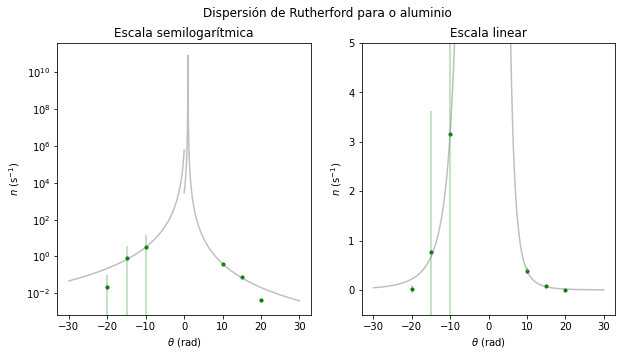

In [104]:
xALneg=np.array([-20, -15, -10])
nALneg=np.array([0.021698625, 0.770989204, 3.157414601])
snALneg=np.array([0.08100167, 2.846353963, 11.65660857])


xALpos=np.array([ 10, 15, 20])
nALpos=np.array([ 0.393736111, 0.075065817, 0.004111629])
snALpos=np.array([0.067744263, 0.01291562, 0.000975261])



fAL, axsAL = plt.subplots(1,2,figsize=(10,5))

plt.subplot(1, 2, 1)

plt.plot(xALneg,nALneg,'g.')
coefALneg=so.curve_fit(N, xALneg, nALneg)
yfitALneg=N(Tneg,coefALneg[0][0],coefALneg[0][1])
plt.plot(Tneg, yfitALneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALneg, nALneg, xerr=np.pi/180, yerr=snALneg, fmt="g.", alpha=0.3)

plt.plot(xALpos,nALpos,'g.')
coefALpos=so.curve_fit(N, xALpos, nALpos)
yfitALpos=N(Tpos,coefALpos[0][0],coefALpos[0][1])
plt.plot(Tpos, yfitALpos, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALpos, nALpos, xerr=np.pi/180, yerr=snALpos, fmt="g.", alpha=0.3)
plt.semilogy()

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.title(u'Escala semilogarítmica')



plt.subplot(1, 2, 2)

plt.plot(xALneg,nALneg,'g.')
coefALneg=so.curve_fit(N, xALneg, nALneg)
yfitALneg=N(Tneg,coefALneg[0][0],coefALneg[0][1])
plt.plot(Tneg, yfitALneg, color='grey', ls='-', alpha=0.5)
plt.errorbar(xALneg, nALneg, xerr=2*np.pi/180, yerr=snALneg, fmt="g.", alpha=0.3)

plt.plot(xALpos,nALpos,'g.')
coefALPos=so.curve_fit(N, xALpos, nALpos)
yfitALpos=N(Tpos,coefALpos[0][0],coefALpos[0][1])
plt.errorbar(xALpos, nALpos, xerr=np.pi/180, yerr=snALpos, fmt="g.", alpha=0.3)
plt.plot(Tpos, yfitALpos, color='grey', ls='-', alpha=0.5)

plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
plt.ylim(-0.5,5)
plt.title(u'Escala linear')

plt.suptitle(u'Dispersión de Rutherford para o aluminio')

plt.savefig('sample')


print( 'N0neg=',coefALneg[0][0], 'Bneg=', coefALneg[0][1])
print( 'N0pos=',coefALpos[0][0], 'Bneg=', coefALpos[0][1])

`queda regular`

Quedarianos agora comparar estes resultados co $A$ teórico: $$\displaystyle A=N_0c_Fd_F\frac{Z^2e^4}{(8\pi\epsilon_0E_\alpha)^2}$$

Tomamos como valores $N_0$ indicado anteriormente:

- $c_F=\frac{N\rho}{A}$, $A$ sendo o peso atómico

- $d_F=2.5, 8\hspace{1mm}\mathrm{\mu m}$ para $Au$ e $Al$ respectivamente

- $Z(Au)=79$
- $E_\alpha\approx4.5\mathrm{MeV}$ (segundo se proporciona no guión da práctica, aínda que a radiación $\alpha$ emitida polo Americio 241 ten unha enerxía media de $5.5\mathrm{Mev}$, ao saír do encapsulamento da mostra as partículas quedan cunha enerxía máis preto do outro valor proporcionado).

Podemos calculalo para o caso do ouro:

In [105]:
A=57.51499488483361*6.022*10**23*19.3/197*2.5*(79/(8*np.pi*8.85*10**(-12)*4.5*10**6))**2*1.602**2*10**(-38)
print(r'A teórico ouro:', A)
print('Experimentalmente, para os lados negativo e positivo:')
print(coefOUROneg[0][0], ';', coefOUROpos[0][0])

A teórico ouro: 0.001356253418822156
Experimentalmente, para os lados negativo e positivo:
191.89190694879534 ; 370.00873080334964


`Teño unha discrepancia de 2 ordes de magnitude`

# Cálculo do Z do aluminio

Valerémonos da relación entre as contas para o ouro e o aluminio $\displaystyle \frac{N_{Au}}{N_{Al}}=\frac{c_{Au}d_{Au}Z_{Au}^2}{c_{Al}d_{Al}Z_{Al}^2}$ para obter o Z do aluminio do seguinte xeito:

$$Z_{Al}=\sqrt{\frac{N_{Al}(\theta)c_{Au}d_{Au}}{N_{Au}(\theta)c_{Al}d_{Al}}}Z_{Au}$$

In [106]:
Zalneg=np.zeros(5)
Zalpos=np.zeros(5)

for i in range(len(nALneg)):
    Zalneg[i]=np.sqrt(nALneg[i]*19.3/2.7*26.98/197*2.5/8)*79
    
for i in range(len(nALpos)):
    Zalpos[i]=np.sqrt(nALpos[i]*19.3/2.7*26.98/197*2.5/8)*79
    
    
Zal=np.concatenate((Zalneg,Zalpos), axis=None)

Z_Al=np.mean(Zal)

print(u'Número atómico do aluminio:')
print('Cada valor:', Zal)

print('Media:', Z_Al)
    

Número atómico do aluminio:
Cada valor: [ 6.43654547 38.3672686  77.64304168  0.          0.         27.41822638
 11.97175559  2.80184234  0.          0.        ]
Media: 16.463868006403686


`Tiña que quedar 13.........`